# Find missing values

In this exercise, you will learn how to find whether your data contains any missing values.

In [1]:
import pandas as pd
co2_levels = pd.read_csv("dataset/co2_levels.csv")
# Display first seven rows of co2_levels
print(co2_levels.head(7))

    datestamp    co2
0  1958-03-29  316.1
1  1958-04-05  317.3
2  1958-04-12  317.6
3  1958-04-19  317.5
4  1958-04-26  316.4
5  1958-05-03  316.9
6  1958-05-10    NaN


In [2]:
# Set datestamp column as index
co2_levels = co2_levels.set_index("datestamp")

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


# Handle missing values

In order to replace missing values in your time series data, you can use the command:

`df = df.fillna(method="ffill")`

where the argument specifies the type of method you want to use. For example, specifying `bfill` (i.e backfilling) will ensure that missing values are replaced using the next valid observation, while `ffill` (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.

In [3]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


# Display rolling averages

It is also possible to visualize rolling averages of the values in your time series. This is equivalent to "smoothing" your data, and can be particularly useful when your time series contains a lot of noise or outliers.

In [4]:
# import matplotlib.pyplot as plt
# ma = pd.DataFrame()

# # Compute the 52 weeks rolling mean of the co2_levels DataFrame
# ma['co2'] = co2_levels.rolling(window=52).mean().fillna(method = 'bfill')

# # Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
# ma['std'] = co2_levels.rolling(window=52).std().fillna(method = 'bfill')

# # Add the upper bound column to the ma DataFrame
# ma['upper'] = ma['co2'] + (ma['std'] * 2)

# # Add the lower bound column to the ma DataFrame
# ma['lower'] = ma['co2'] - (ma['std'] * 2)

# # Plot the content of the ma DataFrame
# ax = ma.plot(linewidth=0.8, fontsize=6)

# # Specify labels, legend, and show the plot
# ax.set_xlabel('Date', fontsize=10)
# ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
# ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
# plt.show()

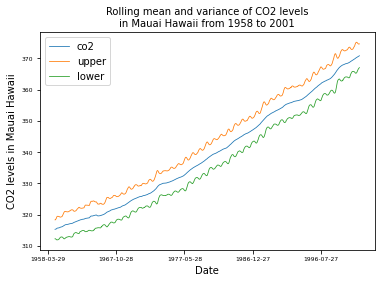

In [6]:
import matplotlib.pyplot as plt

# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

# Display aggregated values

You may sometimes be required to display your data in a more aggregated form. For example, the co2_levels data contains weekly data, but you may need to display its values aggregated by month of year. 

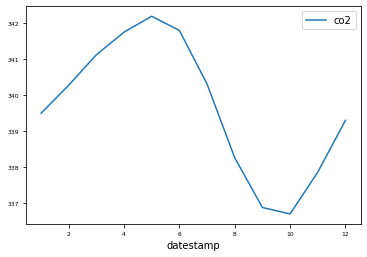

In [10]:
co2_levels.index = pd.to_datetime(co2_levels.index)
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize = 6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

# Compute numerical summaries

You have learnt how to display and annotate time series data in multiple ways, but it is also informative to collect summary statistics of your data. Being able to achieve this task will allow you to share and discuss statistical properties of your data that can further support the plots you generate. 

In [13]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.min().values)

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.max().values)

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
[313.]
[373.9]


# Boxplots and Histograms

oxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of your data. You can generate a boxplot by calling the `.boxplot()` method on a DataFrame.

Another method to produce visual summaries is by leveraging histograms, which allow you to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread.

No handles with labels found to put in legend.


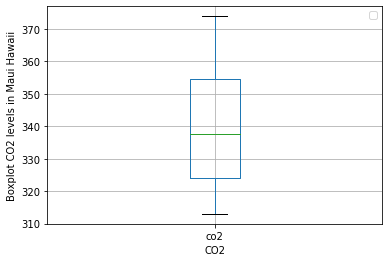

In [14]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

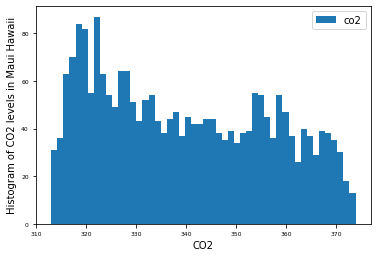

In [16]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins = 50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

# Density plots

In practice, histograms can be a substandard method for assessing the distribution of your data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of your data. 

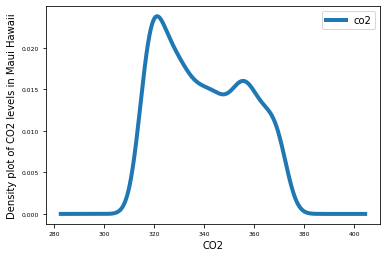

In [17]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='kde', linewidth=4, fontsize=6)

# Annotate x-axis labels
plt.xlabel('CO2', fontsize=10)

# Annotate y-axis labels
plt.ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()